In [18]:
import keras
import numpy as np
from keras.models import Sequential

# Image Classification
We are going to build a convolutional neural network to predict image classes on CIFAR-10, a dataset of images of 10 different things (i.e. 10 classes). Things like airplanes, cars, deer, horses, etc. 

**(a)** Load the cifar10 dataset from Keras. If you need a hint go to [Keras Datasets](https://keras.io/datasets). This might take a little while to download.

In [27]:
from keras.datasets import cifar10
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = cifar10.load_data()

In [43]:
#Define Cifar Translations
cifar_dict = {
    0: "plane",
    1:"car",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"
}

**(b)** Initialize a Sequential model

In [28]:
cifar_model = Sequential()

**(c)** Add a ``Conv2D`` layer to the model. It should have 32 filters, a 5x5 kernel, and a 1x1 stride. The documentation [here](https://keras.io/layers/convolutional/#conv2d) will be your friend for this problem. __Hint:__ This is the first layer of the model so you have to specify the input shape. I recommend printing ``cifar_x_train.shape``, to get an idea of what the shape of the data looks like. Then add a ```relu``` activation layer to the model.

In [29]:
from keras.layers.convolutional import Conv2D
from keras.layers import Activation
print(cifar_x_train.shape)
##YOUR CODE HERE

cifar_model.add(Conv2D(32, (5,5), input_shape=(32,32,3)))
cifar_model.add(Activation('relu'))

(50000, 32, 32, 3)


**(d)** Add a ``MaxPooling2D`` layer to the model. The layer should have a 2x2 pool size. The documentation for Max Pooling is [here](https://keras.io/layers/pooling/).

In [30]:
from keras.layers.pooling import MaxPooling2D
##YOUR CODE HERE

cifar_model.add(MaxPooling2D(pool_size=(2,2)))

**(e)** Add another ``Conv2D`` identical to last one, then another ``relu`` activation, then another ``MaxPooling2D`` layer. __Hint:__ You've already written this code

In [31]:
##YOUR CODE HERE

cifar_model.add(Conv2D(32, (5,5)))
cifar_model.add(Activation('relu'))
cifar_model.add(MaxPooling2D(pool_size=(2,2)))

**(f)** Add another ``Conv2D`` layer identical to the others except with 64 filters instead of 32. Add another ``relu`` activation layer.

In [32]:
##YOUR CODE HERE

cifar_model.add(Conv2D(64, (5,5)))
cifar_model.add(Activation('relu'))

**(g)** Now we want to move from 2D data to 1D vectors for classification, to this we have to flatten the data. Keras has a layer for this called [Flatten](https://keras.io/layers/core/#flatten). Then add a ``Dense`` (fully connected) layer with 64 neurons, a ``relu`` activation layer, another ``Dense`` layer with 10 neurons, and a ``softmax`` activation layer.

In [33]:
from keras.layers import Flatten
from keras.layers import Dense
##YOUR CODE HERE

cifar_model.add(Flatten())
cifar_model.add(Dense(64))
cifar_model.add(Activation('relu'))
cifar_model.add(Dense(10))
cifar_model.add(Activation('softmax'))

Notice that we have constructed a network that takes in an image and outputs a vector of 10 numbers and then we take the softmax of these, which leaves us with a vector of 0s except 1 one and the location of this one in the vector corresponds to which class the network is predicting for that image. This is sort of the canonical way of doing image classification.

**(h)** Now print a summary of your network.

In [34]:
##YOUR CODE HERE

cifar_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 32)        25632     
_________________________________________________________________
activation_7 (Activation)    (None, 10, 10, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 64)         

**(i)** We need to convert our labels from integers to length 10 vectors with 9 zeros and 1 one, where the integer label is the index of the 1 in the vector. Luckily, Keras has a handy function to do this for us. Have a look [here](https://keras.io/utils/#to_categorical).

In [35]:
from keras.utils import to_categorical
y_train_cat = to_categorical(cifar_y_train)
y_test_cat = to_categorical(cifar_y_test)

**(j)** Now compile the model with SGD optimizer and categorical_crossentropy loss function and also include ``metrics=['accuracy']`` as a parameter so we can see the accuracy of the model. Then train the model on the training data. For training we want to weight the classes in the loss function, so set the ``class_weight`` parameter of fit to be the ``class_weights`` dictionary. Be warned training can take forever, I trained on a cpu for 20 epochs (about 30 minutes) and only got 20% accuracy. For the purposes of this assignment, you don't need to worry to much about accuracy, just train for at least 1 epoch.

In [37]:
##YOUR COMPILING CODE HERE

cifar_model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [40]:
class_weights = {}
for i in range(10):
    class_weights[i] = 1. / np.where(cifar_y_train==i)[0].size

##YOUR TRAINING CODE HERE

cifar_model.fit(cifar_x_train, y_train_cat, class_weight=class_weights, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
50000/50000 [==============================] - 52s 1ms/step - loss: 0.0014 - accuracy: 0.1104
Epoch 2/5
50000/50000 [==============================] - 66s 1ms/step - loss: 7.7821e-04 - accuracy: 0.1325
Epoch 3/5
50000/50000 [==============================] - 58s 1ms/step - loss: 5.8924e-04 - accuracy: 0.1443
Epoch 4/5
50000/50000 [==============================] - 56s 1ms/step - loss: 5.3754e-04 - accuracy: 0.1523
Epoch 5/5
50000/50000 [==============================] - 54s 1ms/step - loss: 5.0921e-04 - accuracy: 0.1605


Now we can evaluate on our test set.

In [41]:
cifar_model.evaluate(cifar_x_test, y_test_cat)

10000/10000 [==============================] - 3s 296us/step


[2.5048769306182863, 0.1687999963760376]

We can also get the class labels the network predicts on our test set and look at a few examples.

Predicted label:  horse
True label:  car


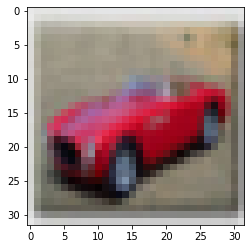

In [45]:
y_pred = cifar_model.predict(cifar_x_test)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(cifar_x_test[1234])
print("Predicted label: ", cifar_dict[np.argmax(y_pred[1234])])
print("True label: ", cifar_dict[cifar_y_test[1234][0]])